# Obtención de la constante de Hubble
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
%pylab inline
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import math
import random
from scipy.optimize import fmin
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


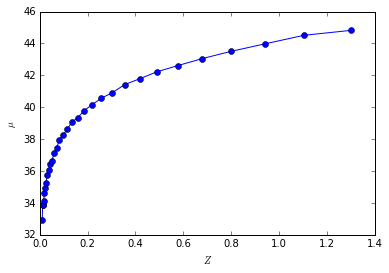

In [2]:
# Abrimos el arch. que contiene los datos 
f1=np.loadtxt('jla_mub_covmatrix.txt',delimiter = '\t',skiprows=0,usecols=[0,0]) 
f2=np.loadtxt('jla_mub.txt',delimiter = '\t',skiprows=0,usecols=[0,1]) 
covmatrix=f1[:,0]
z=f2[:,0]
mud=f2[:,1]
n=np.size(covmatrix) # Contabilizamos el número de datos que tenemos
plt.plot(z,mud,'bo', linestyle='-')
plt.xlabel("$Z$")
plt.ylabel("$\mu$")
plt.show()

In [3]:
cov=np.ones((31, 31))
m=0
for i in range(31):
    for j in range(31):
        cov[i][j]=covmatrix[m]
        m=m+1
var=np.diag(cov)

In [4]:
print(np.mean(mud))

38.7628225466


### Haciendo uso del logaritmo de la función maximizada de Likelihood

$-Ln(\mathfrak{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}^{2}} \right )$

In [5]:
# Prueba de la variable de materia
def test(om1):
    test2=1
    while(test2):
        if(om1<0):
            om1=np.random.normal(om0,sig)
            if(om1>1):
                om1=om0
        else:
            if(om1>1):
                om1=om0
            else:
                test2=0
    return(om1)

def eta(a,om):
    test(om)
    s3=(1.0-om)/om
    s2=s3**(2./3)
    s=s3**(1./3)
    return (2.0*np.sqrt(s3+1)*((1./a**4)-0.1540*s*(1./a**3)+0.4304*s2+0.19097*s3*(1./a)+0.066941*(s**4)))**(-1/8)
# Definición del likelihood
def likelihood(H,om,z,y,var):
    n=np.size(var)
    c=2.8**3
    arg=0
    for i in range(n):
        a=1./(1+z[i])
        D=(c/H)*(1./a)*(eta(1.,om)-eta(a,om))
        x= 25-5*np.log10(H/100.0)+5*np.log10(D)
        arg=arg+(((y[i]-x)**2)/(var[i]))
    lhood=arg/2.
    return lhood

Optimization terminated successfully.
         Current function value: 333.738661
         Iterations: 18
         Function evaluations: 36
[ 0.31804688]


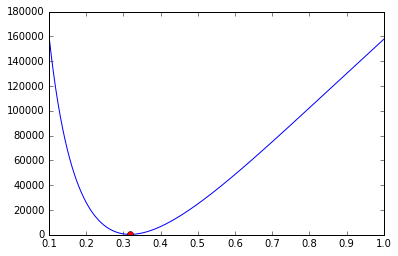

In [6]:
num=1000
x=np.linspace(0.1,1,num)
y=np.zeros(num)
y2=likelihood(2*np.mean(mud),.3,z,mud,var)
x2=2*np.mean(mud)
robj = lambda x: likelihood(x,.3,z,mud,var)
for i in range(num):
    y[i]=likelihood(x[i],.3,z,mud,var)
x0 = .1
xmin0 = fmin(robj,x0)
print(xmin0)
plt.plot(x,y)
plt.plot(xmin0,likelihood(xmin0,.3,z,mud,var),'ro')

In [7]:
# Algoritmo del likelihood más óptimo
def mcp(y1,y0,H1,om1,H0,om0):
    ratio=y0/y1
    if(y1<y0):
        H0=H1
        om0=om1
    else:
        err = np.exp(-ratio)
        prob= random.randint(0,1)
        if(err>prob):
            H0=H1
            om0=om1
    global v
    v=np.array([H0,om0])
    return v

In [8]:
# Vectores iniciales del método iterativo
H0=0.087
om0=0.15
# Parámetros iniciales de convergencia
random.seed(1)
sigma=.001
sig=.001
print("Ingrese el número máx. de iteraciones")
m=int(input())
sol1=np.zeros(m)
sol2=np.zeros(m)
pasos=np.zeros(m)
v=np.array([H0,om0])

for i in range(m):
    pasos[i]=i
    #print(v[0])
    H1=np.random.normal(v[0],sigma)
    om1=np.random.normal(v[1],sig)
    om1=test(om1)
    y0 = likelihood(v[0],v[1],z,mud,var)
    y1 = likelihood(H1,om1,z,mud,var)
    mcp(y1,y0,H1,om1,v[0],v[1])
    sol1[i]=v[0]
    sol2[i]=v[1]
print('Las soluciones son:',v[0]*400,v[1]*2.)

Ingrese el número máx. de iteraciones
10000
('Las soluciones son:', 79.478342547537025, 0.35121310113929843)


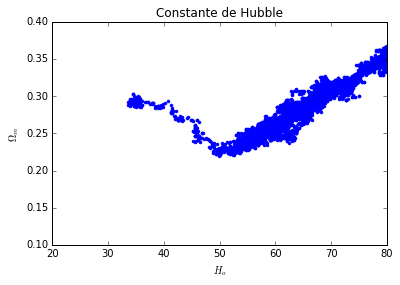

In [9]:
plt.plot(sol1*400,sol2*2.,'.')
plt.title("Constante de Hubble")
plt.xlabel("$H_{o}$")
plt.ylabel("$\Omega_{m}$")
plt.xlim(20,80)
plt.ylim(.1,.4)
#plt.autoscale()
plt.show()